In [1]:
! [ -e /content ] && pip install -Uqq fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 19.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.1/124.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 26.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install --upgrade ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.1 MB/s eta 0:00:0000:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: jupyterlab_widgets
    Found existing installation: jupyterlab_widgets 1.1.11
    Uninstalling jupyterlab_widgets-1.1.11:
      Successfully uninstalled jupyterlab_widgets-1.1.11
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.8.5
    Uninstalling ipywidgets-7.8.5:
      Successfully uninstalled ipywidgets-7.8.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastbook

In [3]:
! pip install duckduckgo_search pathlib fastdownload

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 23.2 MB/s eta 0:00:0000:0100:01


In [4]:
from fastbook import *
from fastai.vision.widgets import *
import time
from pathlib import Path
from duckduckgo_search import DDGS

In [5]:
def search_images(term, max_images=150, delay=1.0):
    print(f"Searching for '{term}'")
    results = []
    with DDGS() as ddgs:
        for result in ddgs.images(term, max_results=max_images):
            results.append(result['image'])
            time.sleep(delay / 10)  # small delay between individual results to be polite
    return results

In [6]:
types_pain = ['baguette tradition', 'pain de campagne', 'pain de mie', 'bagel']
path = Path('pains')
path.mkdir(exist_ok=True)

In [7]:
for pain in types_pain:
    dest = path / pain
    dest.mkdir(exist_ok=True)
    print(f"Downloading images for '{pain}'...")

    urls = search_images(f'{pain}', max_images=150, delay=1.0)
    
    time.sleep(5)  # delay before downloading
    download_images(dest, urls=urls)

    time.sleep(5)  # delay before verification
    failed = verify_images(dest.ls())
    if failed:
        print(f"Removing {len(failed)} failed images for '{pain}'.")
        failed.map(Path.unlink)

    time.sleep(10)  # delay between pain types to reduce risk of hitting rate limits

print("Download complete!")

Searching for 'baguette tradition'
Removing 2 failed images for 'baguette tradition'.
Searching for 'pain de campagne'
Removing 6 failed images for 'pain de campagne'.
Searching for 'pain de mie'
Removing 3 failed images for 'pain de mie'.
Searching for 'bagel'
Removing 8 failed images for 'bagel'.
Download complete!


In [8]:
pdc_img = search_images("pain de campagne",1)

Searching for 'pain de campagne'


In [9]:
pdc_img

['https://gourmandiseassia.fr/wp-content/uploads/2020/03/PicsArt_03-25-08.56.55.jpg']

In [10]:
dest = path / "paindecampagne.jpg"
download_images(dest, urls=pdc_img)

In [ ]:
??download_images

In [ ]:
im = Image.open('/kaggle/working/pains/82d424c3-23fb-43be-b571-fd3be8b428e3.jpg')
im.to_thumb(128,128)

In [11]:
fns = get_image_files(path)
fns

(#523) [Path('pains/baguette tradition/c46aa132-9bff-456f-aa03-c1190a95b7df.jpg'),Path('pains/baguette tradition/4282196d-6486-43e8-ac7b-9694364bb760.jpg'),Path('pains/baguette tradition/74ab7e37-1fb0-45f6-8f59-ba54991e65b8.jpg'),Path('pains/baguette tradition/f887b6bf-5000-4d36-9d19-ee64b9d20098.jpg'),Path('pains/baguette tradition/77003a31-0a92-4aac-aa8a-5259821d0df0.jpg'),Path('pains/baguette tradition/f789889f-0bc5-4590-aa74-65d14c890127.jpg'),Path('pains/baguette tradition/ac0a8a9e-6afb-4f2d-a39b-55d3c3d2612a.jpg'),Path('pains/baguette tradition/eefa6e53-762f-4a69-8cb8-90e23e51a345.jpg'),Path('pains/baguette tradition/d823b386-293a-47f5-9b61-503008d76ae3.jpg'),Path('pains/baguette tradition/93045bb2-8696-4377-b551-37ae2cc1419e.jpg'),Path('pains/baguette tradition/3d348494-5c0f-4858-8adc-b673683627f6.jpg'),Path('pains/baguette tradition/afc0930a-29db-48ab-aa8e-3a464f4b7ace.jpg'),Path('pains/baguette tradition/e2a2fb5e-cb9d-4623-bb36-90c8302c774c.jpg'),Path('pains/baguette tradition

In [22]:
pains = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = pains.dataloaders(path)

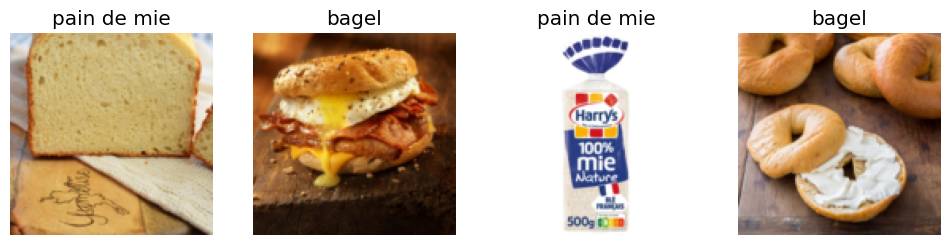

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

In [23]:
pains = pains.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = pains.dataloaders(path)

In [24]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.035747,0.936523,0.262136,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.807809,0.565971,0.165049,01:03
1,0.645894,0.489274,0.126214,00:53
2,0.517595,0.497360,0.145631,00:53
3,0.424164,0.486126,0.145631,00:53


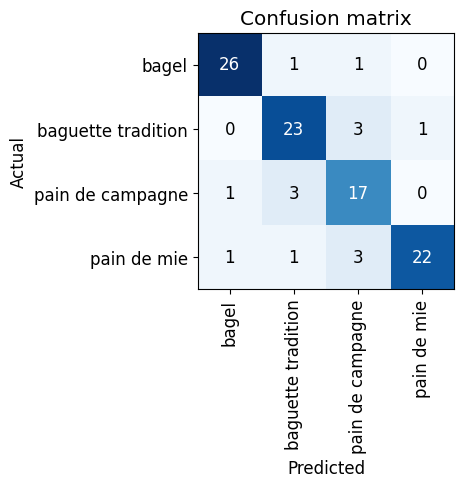

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

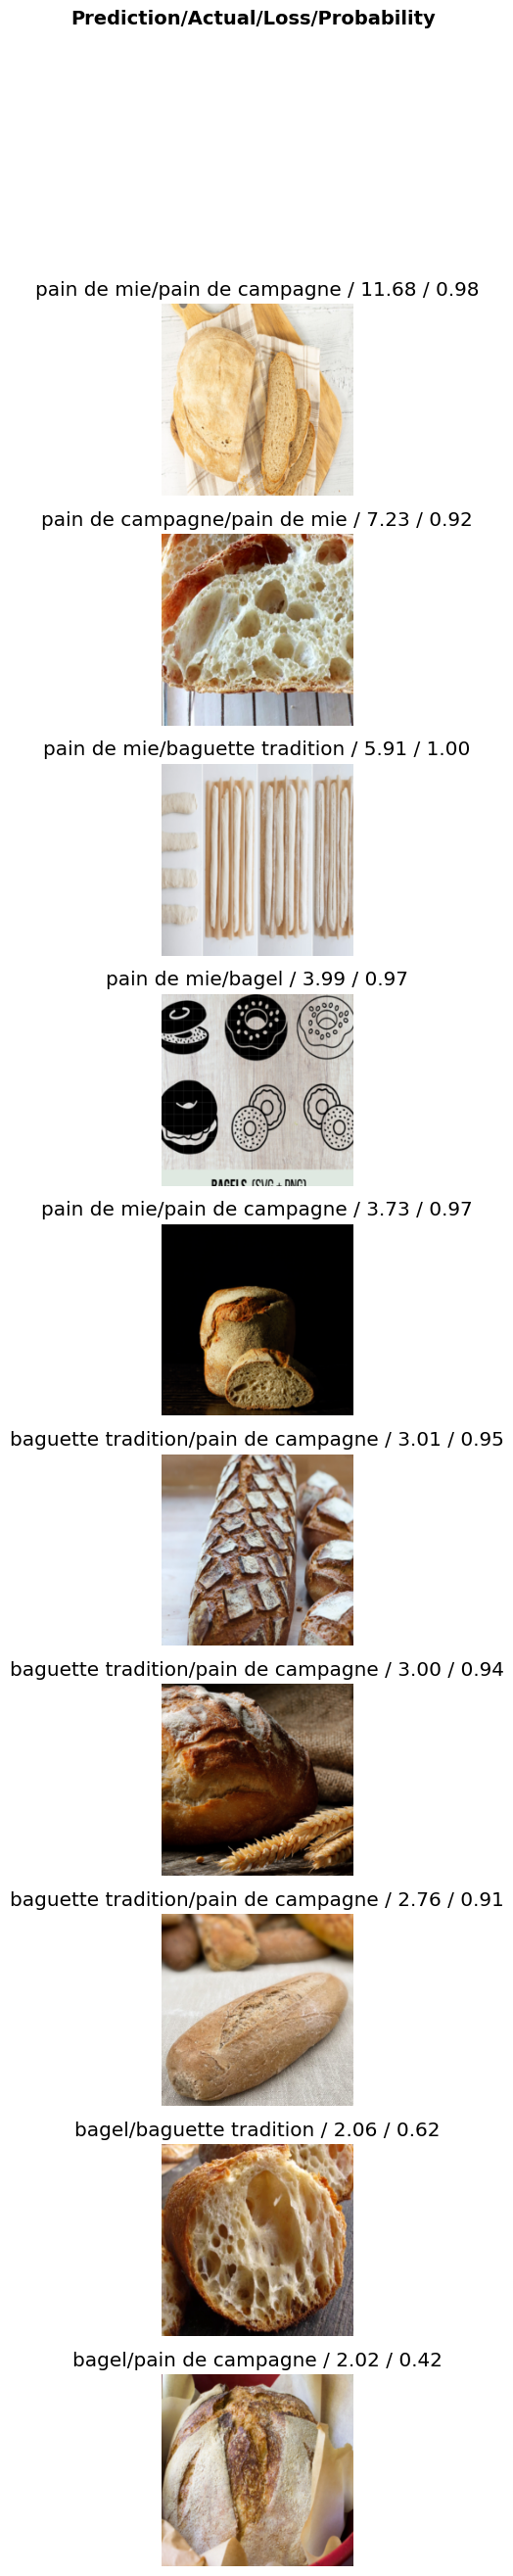

In [18]:
interp.plot_top_losses(10, nrows=10)


In [26]:
learn.export()

In [20]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [21]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)